<a href="https://colab.research.google.com/github/ceydabaloglu/Data-analysis-methods/blob/master/Time_Series_INF506_UE12.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# INF506 Methoden der Datenanalyse - ÜBUNG 12 - 06.12.2022

**Matrikelnummer**\ :170503036
**Vorname, Name** : Ceyda Baloğlu


Lesen Sie die Datendatei ein. Weisen Sie die Daten einem Pandas-Datenframe zu. 
Die Datei enthält gemessene Orte und Flächen von Sonnenfleckengruppen zwischen 1976 und 1996, für zwei aufeinanderfolgende Sonnenaktivitätszyklen. Die Orte sind nach Längen- und Breitengraden geordnet. 


In [ ]:
import pandas as pd
import numpy as np
from datetime import datetime
from matplotlib import pyplot as plt

In [ ]:
path = './data2.txt'

In [ ]:
df = pd.read_csv(path,sep="\s+")

**i**: Means that this data belong to sunspot *groups*, not to individual sunspots  
**yr, mo, da, hr, mi, se**: year, month, day, hour, minute, second  
**id**: ID number of the sunspot group  
**pr1, pr2**: Projected group-area quantities. Just ignore them for this task  
**ua**: Umbral area of sunspot group (umbra is the darkest central region of a sunspot)  
**ws**: Whole-spot area of sunspot group (in millionths of the visible solar hemispheric area)  
**lat**: Latitude (degrees)  
**lon**: Longitude (degrees)  
**lcm**: Longitudinal distance from the Sun's central meridian  
**pa**: Position angle (irrelevant now)  
**dcen**: Distance from the centre of Sun's disc measured in units of the solar radius

# Preprocessing steps

In [ ]:
df.loc[(df.se > 59),'se'] = 59

In [ ]:
# Eliminating missing data, which are indicated by 999999.
df = df[~(df == 999999).any(axis='columns')]

In [ ]:
# Filter according to lcm
#df.drop([df['lcm'] < 60].index, inplace=True)
df = df[np.abs(df.lcm) <= 70]

In [ ]:
# Clean zero-area groups
df = df[~(df.ws == 0)]
df = df[~(df.ua == 0)]

df

,i,yr,mo,da,hr,mi,se,id,pr1,pr2,ua,ws,lat,lon,lcm,pa,dcen
0,g,1976,1,1,0,0,0,675,4,9,3,5,-8.40,33.95,36.89,261.68,0.6024
1,g,1976,12,31,23,59,59,675,4,9,3,5,-8.40,33.95,36.89,261.68,0.6024
2,g,1977,1,1,0,0,0,675,4,9,3,5,-8.40,33.95,36.89,261.68,0.6024
3,g,1976,1,12,12,11,35,675,4,9,3,5,-8.40,33.95,36.89,261.68,0.6024
6,g,1976,1,14,1,13,30,676,128,700,106,581,-10.25,283.47,-53.28,99.54,0.8006
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57672,g,1996,12,21,5,57,0,8007,3,23,2,14,4.37,238.95,36.58,279.59,0.6050
57674,g,1996,12,22,8,10,0,8004,15,82,17,95,5.32,252.25,64.27,276.79,0.9052
57675,g,1996,12,22,8,10,0,8007,4,20,3,16,4.35,240.19,52.21,276.94,0.7959
57678,g,1996,12,23,2,35,0,8007,2,11,2,13,5.18,240.00,62.02,276.89,0.8878


Arrange each date and time element into a DateTime object. You can use [ datetime(...) ] directly within a for loop. 

In [ ]:
lst= []
for i in range(len(df['yr'])):
  lst.append(datetime(df['yr'].iloc[i],df["mo"].iloc[i],df["da"].iloc[i],df["hr"].iloc[i],df["mi"].iloc[i],df["se"].iloc[i]))




Insert this datetime as the column number 1. 

In [ ]:
df.insert(0,"date_time",lst)
df

,date_time,i,yr,mo,da,hr,mi,se,id,pr1,pr2,ua,ws,lat,lon,lcm,pa,dcen
0,1976-01-01 00:00:00,g,1976,1,1,0,0,0,675,4,9,3,5,-8.40,33.95,36.89,261.68,0.6024
1,1976-12-31 23:59:59,g,1976,12,31,23,59,59,675,4,9,3,5,-8.40,33.95,36.89,261.68,0.6024
2,1977-01-01 00:00:00,g,1977,1,1,0,0,0,675,4,9,3,5,-8.40,33.95,36.89,261.68,0.6024
3,1976-01-12 12:11:35,g,1976,1,12,12,11,35,675,4,9,3,5,-8.40,33.95,36.89,261.68,0.6024
6,1976-01-14 01:13:30,g,1976,1,14,1,13,30,676,128,700,106,581,-10.25,283.47,-53.28,99.54,0.8006
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57672,1996-12-21 05:57:00,g,1996,12,21,5,57,0,8007,3,23,2,14,4.37,238.95,36.58,279.59,0.6050
57674,1996-12-22 08:10:00,g,1996,12,22,8,10,0,8004,15,82,17,95,5.32,252.25,64.27,276.79,0.9052
57675,1996-12-22 08:10:00,g,1996,12,22,8,10,0,8007,4,20,3,16,4.35,240.19,52.21,276.94,0.7959
57678,1996-12-23 02:35:00,g,1996,12,23,2,35,0,8007,2,11,2,13,5.18,240.00,62.02,276.89,0.8878


Set this datetime column as the index column.

In [ ]:
df = df.set_index("date_time")
df

,i,yr,mo,da,hr,mi,se,id,pr1,pr2,ua,ws,abs_lat,lat,lon,lcm,pa,dcen
date_time,,,,,,,,,,,,,,,,,,
1976-01-01 00:00:00,g,1976,1,1,0,0,0,675,4,9,3,5,8.40,-8.40,33.95,36.89,261.68,0.6024
1976-12-31 23:59:59,g,1976,12,31,23,59,59,675,4,9,3,5,8.40,-8.40,33.95,36.89,261.68,0.6024
1977-01-01 00:00:00,g,1977,1,1,0,0,0,675,4,9,3,5,8.40,-8.40,33.95,36.89,261.68,0.6024
1976-01-12 12:11:35,g,1976,1,12,12,11,35,675,4,9,3,5,8.40,-8.40,33.95,36.89,261.68,0.6024
1976-01-14 01:13:30,g,1976,1,14,1,13,30,676,128,700,106,581,10.25,-10.25,283.47,-53.28,99.54,0.8006
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1996-12-21 05:57:00,g,1996,12,21,5,57,0,8007,3,23,2,14,4.37,4.37,238.95,36.58,279.59,0.6050
1996-12-22 08:10:00,g,1996,12,22,8,10,0,8004,15,82,17,95,5.32,5.32,252.25,64.27,276.79,0.9052
1996-12-22 08:10:00,g,1996,12,22,8,10,0,8007,4,20,3,16,4.35,4.35,240.19,52.21,276.94,0.7959


Drop the redundant date and time columns (yr, mo, da, ...)

In [ ]:
df.drop(columns = ['yr', 'mo','da','hr','mi','se'])

,date_time,i,id,pr1,pr2,ua,ws,lat,lon,lcm,pa,dcen
0,1976-01-01 00:00:00,g,675,4,9,3,5,-8.40,33.95,36.89,261.68,0.6024
1,1976-12-31 23:59:59,g,675,4,9,3,5,-8.40,33.95,36.89,261.68,0.6024
2,1977-01-01 00:00:00,g,675,4,9,3,5,-8.40,33.95,36.89,261.68,0.6024
3,1976-01-12 12:11:35,g,675,4,9,3,5,-8.40,33.95,36.89,261.68,0.6024
6,1976-01-14 01:13:30,g,676,128,700,106,581,-10.25,283.47,-53.28,99.54,0.8006
...,...,...,...,...,...,...,...,...,...,...,...,...
57672,1996-12-21 05:57:00,g,8007,3,23,2,14,4.37,238.95,36.58,279.59,0.6050
57674,1996-12-22 08:10:00,g,8004,15,82,17,95,5.32,252.25,64.27,276.79,0.9052
57675,1996-12-22 08:10:00,g,8007,4,20,3,16,4.35,240.19,52.21,276.94,0.7959
57678,1996-12-23 02:35:00,g,8007,2,11,2,13,5.18,240.00,62.02,276.89,0.8878


Take the absolute value of the latitude (lat) column and insert this as a new column, to the left side of lat. 

In [ ]:
abs_lat = df['lat'].abs()
df.insert(loc = df.columns.get_loc('lat'),column = 'abs_lat' , value =abs_lat)

In [ ]:
df

,date_time,i,yr,mo,da,hr,mi,se,id,pr1,pr2,ua,ws,abs_lat,lat,lon,lcm,pa,dcen
0,1976-01-01 00:00:00,g,1976,1,1,0,0,0,675,4,9,3,5,8.40,-8.40,33.95,36.89,261.68,0.6024
1,1976-12-31 23:59:59,g,1976,12,31,23,59,59,675,4,9,3,5,8.40,-8.40,33.95,36.89,261.68,0.6024
2,1977-01-01 00:00:00,g,1977,1,1,0,0,0,675,4,9,3,5,8.40,-8.40,33.95,36.89,261.68,0.6024
3,1976-01-12 12:11:35,g,1976,1,12,12,11,35,675,4,9,3,5,8.40,-8.40,33.95,36.89,261.68,0.6024
6,1976-01-14 01:13:30,g,1976,1,14,1,13,30,676,128,700,106,581,10.25,-10.25,283.47,-53.28,99.54,0.8006
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57672,1996-12-21 05:57:00,g,1996,12,21,5,57,0,8007,3,23,2,14,4.37,4.37,238.95,36.58,279.59,0.6050
57674,1996-12-22 08:10:00,g,1996,12,22,8,10,0,8004,15,82,17,95,5.32,5.32,252.25,64.27,276.79,0.9052
57675,1996-12-22 08:10:00,g,1996,12,22,8,10,0,8007,4,20,3,16,4.35,4.35,240.19,52.21,276.94,0.7959
57678,1996-12-23 02:35:00,g,1996,12,23,2,35,0,8007,2,11,2,13,5.18,5.18,240.00,62.02,276.89,0.8878


- Scatter-plot absolute-value of sunspot group latitude (you created above). 
- Resample this quantity in time, with 1-year intervals, taking the mean over each bin. 
- Plot 1-year-averaged latitudes you produced. 
- Plot errorbars that show the standard deviation. 
- On a duplicate scatter-plot with resampled data, plot errorbars that show standard deviation of the mean (check wikipedia for this, if you don't know). 

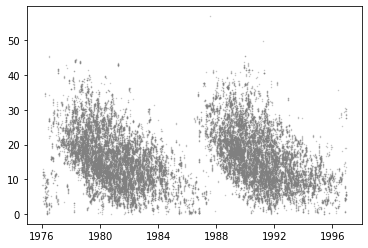

In [ ]:
plt.scatter(df["date_time"],df["abs_lat"],s=.2, c="gray", alpha=0.5)


In [ ]:
p = pd.Series(np.array(df['abs_lat']),index = df.index)
p



date_time
1976-01-01 00:00:00     8.40
1976-12-31 23:59:59     8.40
1977-01-01 00:00:00     8.40
1976-01-12 12:11:35     8.40
1976-01-14 01:13:30    10.25
                       ...  
1996-12-21 05:57:00     4.37
1996-12-22 08:10:00     5.32
1996-12-22 08:10:00     4.35
1996-12-23 02:35:00     5.18
1996-12-24 11:16:49    18.96
Length: 32697, dtype: float64

In [ ]:
resample = p.resample('Y').mean()
resample

date_time
1976-12-31    13.551263
1977-12-31    22.084758
1978-12-31    21.342727
1979-12-31    18.283740
1980-12-31    16.050085
1981-12-31    13.631877
1982-12-31    12.277403
1983-12-31    12.681149
1984-12-31    11.091400
1985-12-31     8.898377
1986-12-31    10.488603
1987-12-31    24.209576
1988-12-31    21.954519
1989-12-31    19.499364
1990-12-31    17.111704
1991-12-31    14.589062
1992-12-31    12.984868
1993-12-31    11.613688
1994-12-31    10.043320
1995-12-31     9.897238
1996-12-31     9.679548
Freq: A-DEC, dtype: float64

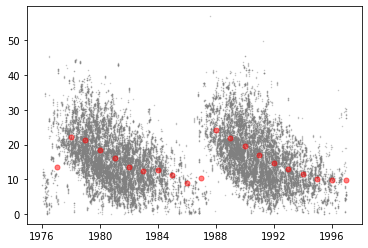

In [ ]:
plt.scatter(df.index,df["abs_lat"],s=.2, c="gray", alpha=0.5)
plt.scatter(resample.index,resample ,s=25, c="red", alpha=0.5)

In [ ]:
new_df = p.resample('Y').std()
new_df

date_time
1976-12-31     9.746413
1977-12-31     6.368392
1978-12-31     6.689896
1979-12-31     7.378116
1980-12-31     7.072644
1981-12-31     6.511074
1982-12-31     5.839704
1983-12-31     5.682539
1984-12-31     4.329891
1985-12-31     4.966813
1986-12-31    10.491839
1987-12-31     8.074396
1988-12-31     6.460602
1989-12-31     6.665567
1990-12-31     7.920368
1991-12-31     7.221985
1992-12-31     5.993044
1993-12-31     5.121965
1994-12-31     4.093632
1995-12-31     4.561350
1996-12-31     6.988213
Freq: A-DEC, dtype: float64

<ErrorbarContainer object of 3 artists>

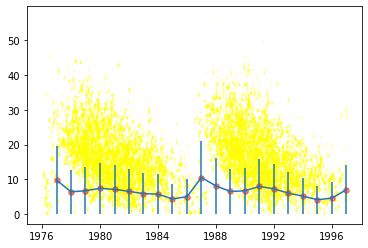

In [ ]:
plt.scatter(df.index,df["abs_lat"],s=.2, c="yellow", alpha=0.5)
plt.scatter(new_df.index,new_df ,s=30, c="red", alpha=0.5)

plt.errorbar(new_df.index ,new_df,yerr= new_df)


- Scatter-plot sunspot group area (ws)
- Calculate rolling maxima with a 1-year window (or 365 days). 

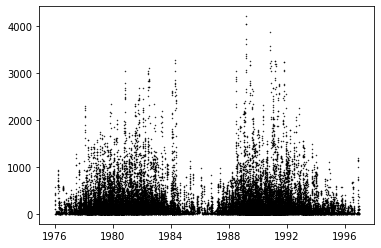

In [ ]:
plt.scatter(df.index ,df['ws'] ,s =.2, c ='Black')

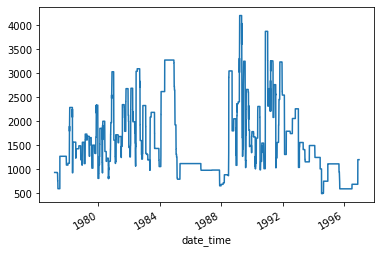

In [ ]:
df["ws"].rolling(365).max().plot()
